# 1. Giới thiệu

## 1.1. Mục tiêu
Phân tích dữ liệu học tập để xác định các yếu tố ảnh hưởng đến điểm thi cuối kỳ (Final_Exam_Score) và khả năng đậu/rớt (Pass_Fail), đồng thời xây dựng mô hình dự đoán.

## 1.2. [About Student Performance Prediction Dataset ](https://www.kaggle.com/datasets/amrmaree/student-performance-prediction/data)

### 1.2.1. Tổng quan
Bộ dữ liệu này chứa thông tin về kết quả học tập của sinh viên, thói quen học tập và các yếu tố bên ngoài ảnh hưởng đến điểm thi cuối kỳ. Bộ dữ liệu được thiết kế để phục vụ cho việc mô hình hóa dự đoán, trực quan hóa dữ liệu và phân tích trong lĩnh vực giáo dục.

### 1.2.2 Mục đích bộ dữ liệu
Bộ dữ liệu này hữu ích cho:
- Dự đoán điểm thi cuối kỳ của sinh viên 
- Xác định các yếu tố chính ảnh hưởng đến kết quả học tập 
- Khám phá tầm quan trọng của các đặc trưng trong các bộ dữ liệu liên quan đến giáo dục 
- Xây dựng các mô hình học máy cho bài toán hồi quy và phân loại 
### 1.2.3. Mô tả cột dữ liệu
| Tên cột | Mô tả |
| ----------- | ----------- |
| Student_ID | Mã định danh duy nhất cho mỗi sinh viên. |
| Gender | Giới tính của sinh viên (Male/Female). |
| Study_Hours_per_Week | Số giờ học trung bình mỗi tuần. |
| Attendance_Rate | Tỷ lệ tham gia lớp học, tức chuyên cần (50% - 100%). |
| Past_Exam_Scores | Điểm trung bình của các kỳ thi trước (50 - 100). |
| Parental_Education_Level | 	Trình độ học vấn của phụ huynh (High School, Bachelors, Masters, PhD) - (Trung học phổ thông, Cử nhân, Thạc sĩ, Tiến sĩ). |
| Internet_Access_at_Home | Sinh viên có truy cập internet tại nhà hay không (Yes/No). |
| Extracurricular_Activities |Sinh viên có tham gia các hoạt động ngoại khóa hay không (Yes/No). |
| Final_Exam_Score (Target) | Điểm thi cuối kỳ của sinh viên (50 - 100, là số nguyên). |
| Pass_Fail (Target) | Kết quả thi (Pass/Fail). |

### 1.2.4. Suy luận bên lề
Quan sát các điểm dữ liệu trong bộ dữ liệu:
- S315,Male,25,78.88159770457736,81,High School,No,No,59,Fail
- S408,Female,35,87.08434721143328,73,Masters,No,Yes,60,Pass

=> Nếu Score < 60 thì Fail, ngược lại thì Pass.

## 1.3. Câu hỏi nghiên cứu
- Những đặc trưng nào có tác động mạnh nhất đến điểm thi cuối kỳ?
- Có thể dự đoán điểm thi cuối kỳ hoặc kết quả Fail/Pass dựa trên các đặc trưng không?

## 1.4. Phương pháp
Thống kê mô tả, trực quan hóa, kiểm định giả thuyết, tương quan, hồi quy, phân loại

# 2. Khám phá dữ liệu

In [2]:
from datascience import *
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)
from matplotlib import patches
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

In [3]:
original_spp = Table.read_table('student_performance_dataset.csv')
original_spp.show(5)

Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
S147,Male,31,68.2678,86,High School,Yes,Yes,63,Pass
S136,Male,16,78.2229,73,PhD,No,No,50,Fail
S209,Female,21,87.5251,74,PhD,Yes,No,55,Fail
S458,Female,27,92.0765,99,Bachelors,No,No,65,Pass
S078,Female,37,98.6555,63,Masters,No,Yes,70,Pass


## 2.1. Kiểm tra cấu trúc dữ liệu

Kích thước bộ dữ liệu, các cột, kiểu dữ liệu

In [4]:
# Số lượng dòng (sinh viên)
print("Số dòng (sinh viên):", original_spp.num_rows)

# Số lượng cột (thuộc tính)
print("Số cột:", original_spp.num_columns)

# Tên các cột
original_spp.labels

Số dòng (sinh viên): 708
Số cột: 10


('Student_ID',
 'Gender',
 'Study_Hours_per_Week',
 'Attendance_Rate',
 'Past_Exam_Scores',
 'Parental_Education_Level',
 'Internet_Access_at_Home',
 'Extracurricular_Activities',
 'Final_Exam_Score',
 'Pass_Fail')

Kiểm tra giá trị thiếu

In [5]:
# Tạo bảng mới kiểm tra giá trị rỗng trong từng cột
def count_missing(column):
    return sum(original_spp.column(column) == '')

Table().with_columns(
    'Cột', original_spp.labels,
    'Số giá trị thiếu', [count_missing(col) for col in original_spp.labels]
).show()


Cột,Số giá trị thiếu
Student_ID,0
Gender,0
Study_Hours_per_Week,0
Attendance_Rate,0
Past_Exam_Scores,0
Parental_Education_Level,0
Internet_Access_at_Home,0
Extracurricular_Activities,0
Final_Exam_Score,0
Pass_Fail,0


### Nhận xét tổng quan
- Dataset Student Performance Prediction có 708 sinh viên. Mỗi sinh viên có 9 đặc trưng (không tính ID)
- Dữ liệu gồm cả biến categorical như Gender, Parental_Education_Level, Internet_Access_at_Home, Extracurricular_Activities, Pass_Fail và biến numerical như Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores, Final_Exam_Score
- Dữ liệu đầy đủ, không đặc trưng nào bị thiếu

## 2.2. Thống kê mô tả

In [6]:
# Các cột numerical
spp_numeric_cols = ['Study_Hours_per_Week', 
                    'Attendance_Rate', 
                    'Past_Exam_Scores', 
                    'Final_Exam_Score']

In [7]:
numerical_features = ['Study_Hours_per_Week', 
                      'Attendance_Rate', 
                      'Past_Exam_Scores']

In [8]:
# Các cột categorical
spp_categorical_cols = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities',
    'Pass_Fail'
]

In [9]:
categorical_features = [
    'Gender',
    'Parental_Education_Level',
    'Internet_Access_at_Home',
    'Extracurricular_Activities'
]

### 2.2.1. Với đặc trưng numerical

Tính trung bình, trung vị, độ lệch chuẩn, min, max

In [10]:
numerical_data = original_spp.select(spp_numeric_cols)
numerical_data_stats = Table().with_columns(
    'Variable', numerical_data.labels,
    'Mean', [np.mean(numerical_data.column(col)) for col in numerical_data.labels],
    'Median', [np.median(numerical_data.column(col)) for col in numerical_data.labels],
    'Std', [np.std(numerical_data.column(col)) for col in numerical_data.labels],
    'Min', [np.min(numerical_data.column(col)) for col in numerical_data.labels],
    'Max', [np.max(numerical_data.column(col)) for col in numerical_data.labels]
)
numerical_data_stats.show()

Variable,Mean,Median,Std,Min,Max
Study_Hours_per_Week,26.1328,27,8.87145,10,39
Attendance_Rate,78.1077,79.363,13.7931,50.117,99.9677
Past_Exam_Scores,77.8715,79,14.3926,50,100
Final_Exam_Score,58.7712,59.5,6.70114,50,77


Trực quan hóa

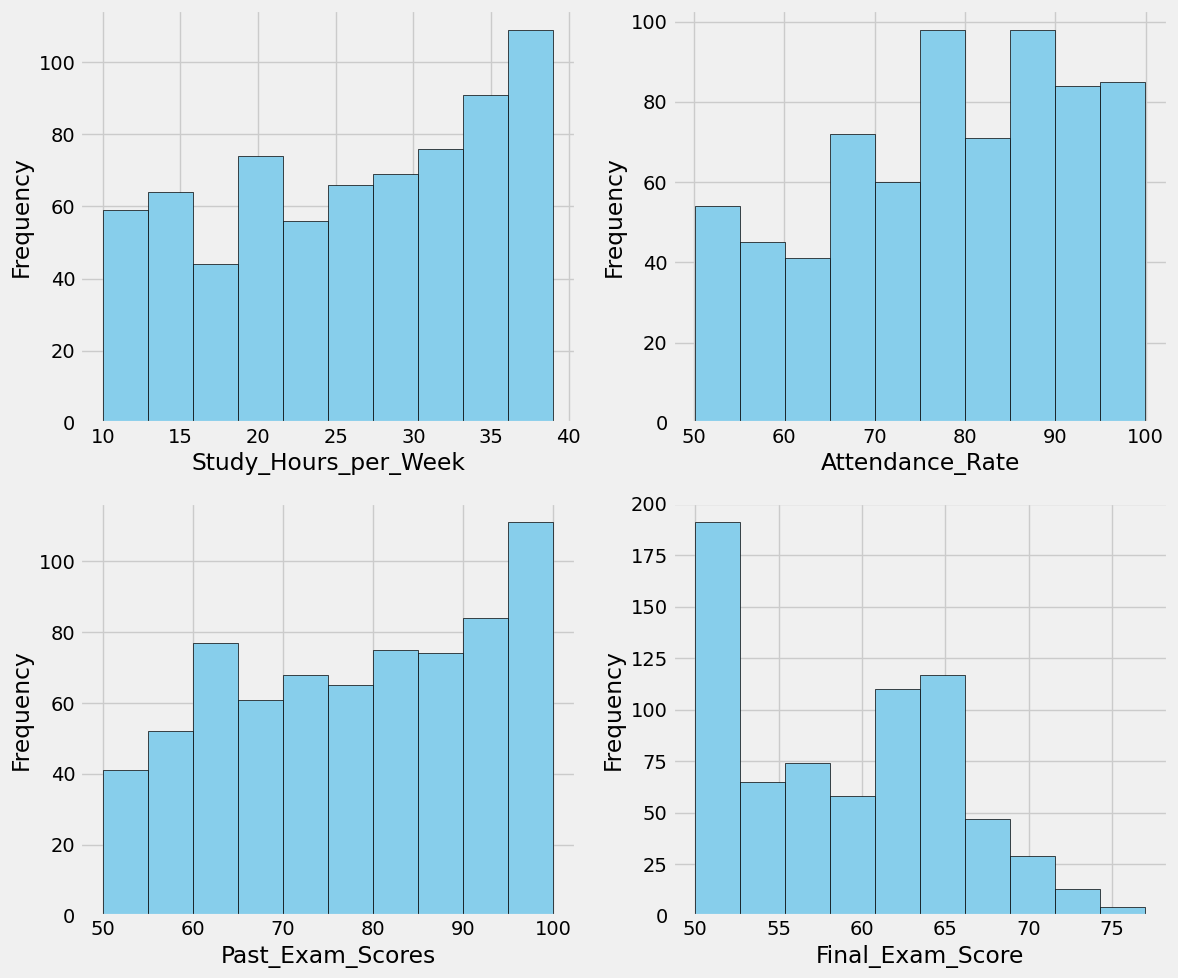

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Tạo lưới 2x2 cho 4 cột
axes = axes.flatten()

for i, col in enumerate(spp_numeric_cols):
    axes[i].hist(numerical_data.column(col), bins=10, color='skyblue', edgecolor='black')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout() 
plt.show()

### 2.2.2. Đặc trưng categorical

Tính tần suất và tỷ lệ phần trăm của các giá trị trong các cột phân loại

--- Gender ---


Gender,count,Percentage
Female,375,52.9661
Male,333,47.0339


--- Parental_Education_Level ---


Parental_Education_Level,count,Percentage
Bachelors,189,26.6949
High School,183,25.8475
Masters,171,24.1525
PhD,165,23.3051


--- Internet_Access_at_Home ---


Internet_Access_at_Home,count,Percentage
No,381,53.8136
Yes,327,46.1864


--- Extracurricular_Activities ---


Extracurricular_Activities,count,Percentage
No,361,50.9887
Yes,347,49.0113


--- Pass_Fail ---


Pass_Fail,count,Percentage
Fail,354,50
Pass,354,50


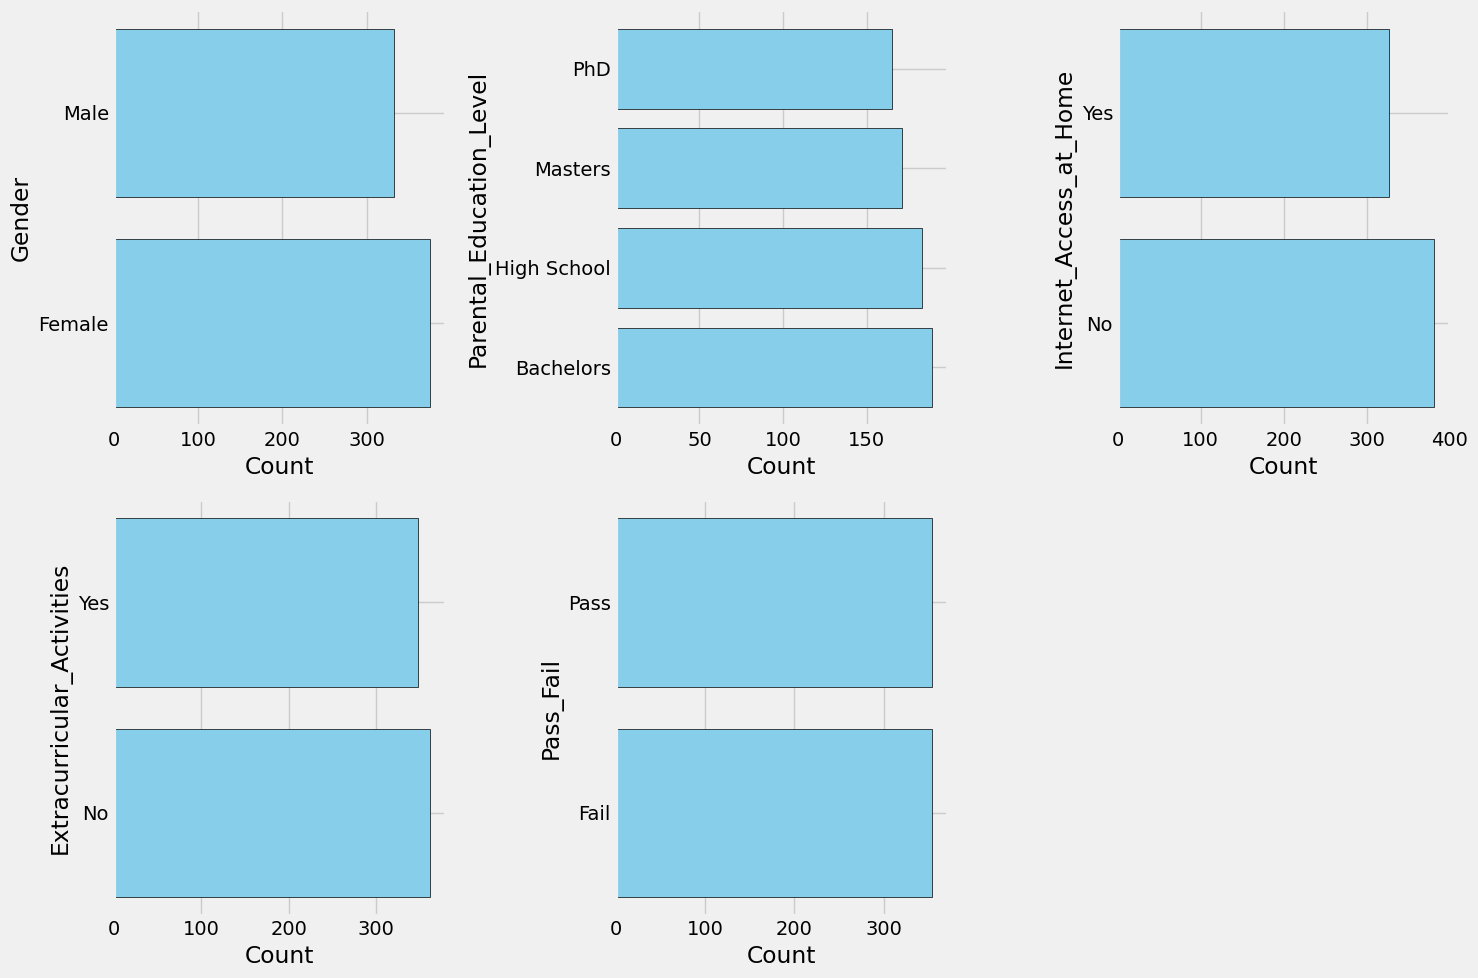

In [12]:
# Hàm phân tích và vẽ biểu đồ cho từng cột
def analyze_categorical_columns(columns):
    rows = (len(columns) + 2) // 3  # Tính số hàng cần thiết cho lưới 2x3
    fig, axes = plt.subplots(rows, 3, figsize=(15, 5 * rows))  # Tạo lưới 2x3
    axes = axes.flatten()  # Chuyển mảng 2D thành 1D để dễ truy cập
    
    for i, col in enumerate(columns):
        counts = original_spp.group(col)  # Đếm số lượng từng nhóm
        total = original_spp.num_rows
        percent = counts.with_column('Percentage', counts.column('count') / total * 100)  # Tính tỷ lệ phần trăm
        
        # Hiển thị bảng tần suất
        print(f'--- {col} ---')
        percent.show()
        
        # Vẽ biểu đồ trên subplot
        axes[i].barh(counts.column(col), counts.column('count'), color='skyblue', edgecolor='black')
        axes[i].set_xlabel('Count')
        axes[i].set_ylabel(col)
    
    # Ẩn các subplot thừa (nếu có)
    for j in range(len(columns), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()  # Căn chỉnh khoảng cách giữa các subplot
    plt.show()

# Chạy phân tích cho tất cả các cột categorical
analyze_categorical_columns(spp_categorical_cols)

# 3. Tương quan

In [13]:
def standard_units(xyz):
    "Convert any array of numbers to standard units."
    return (xyz - np.mean(xyz))/np.std(xyz)  

def correlation(t, label_x, label_y):
    return np.mean(standard_units(t.column(label_x))*standard_units(t.column(label_y)))

## 3.1. Đặc trưng numerical vs Final_Exam_Score

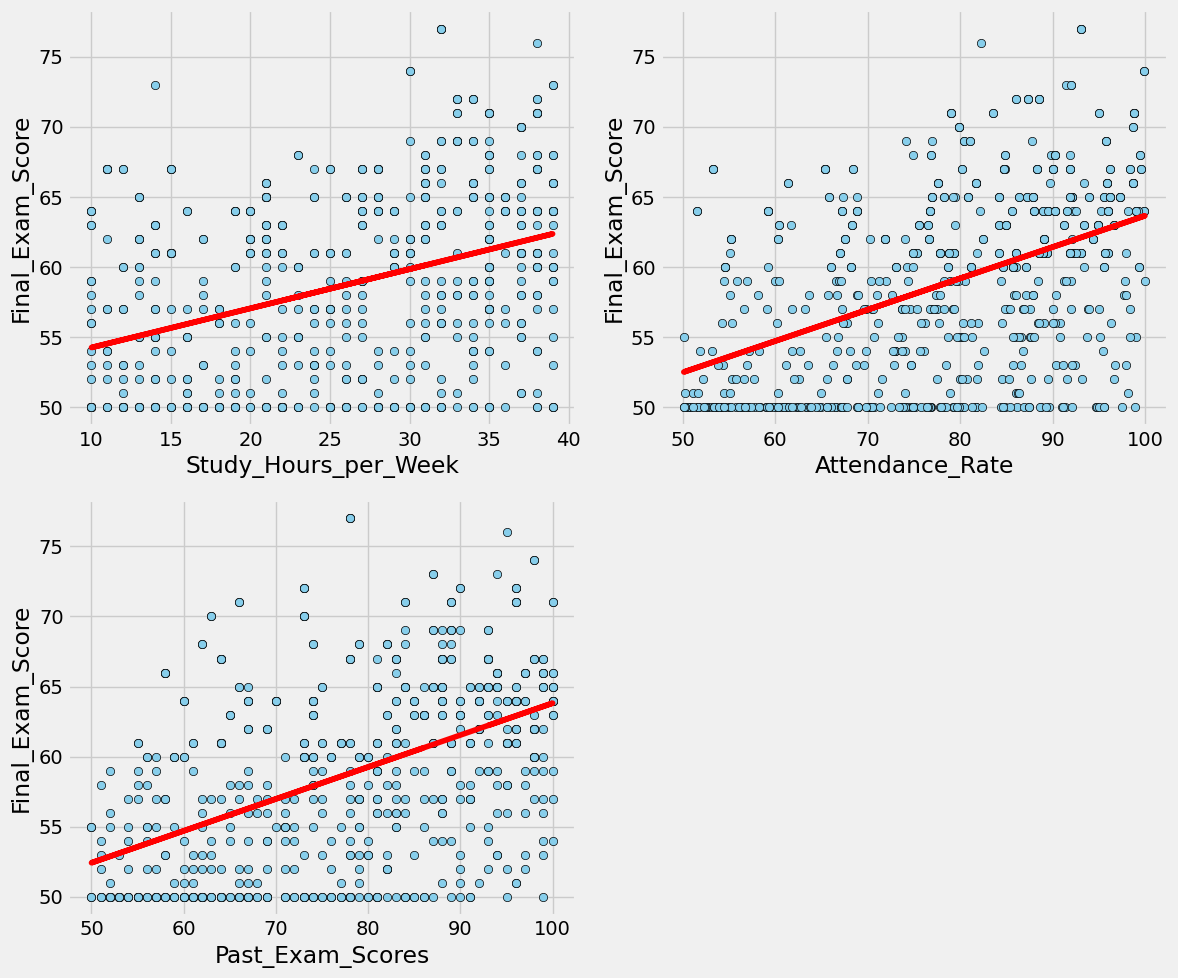

In [14]:
# Vẽ scatter plot với đường hồi quy cho 3 cột numerical (trừ Final_Exam_Score)
def scatter_plots_with_fit_line(numerical_cols, target_col):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # Tạo lưới 2x2
    axes = axes.flatten() 
    
    # Lấy tối đa 3 cột để vẽ
    selected_cols = [col for col in numerical_cols if col != target_col][:3]
    
    for i, col in enumerate(selected_cols):
        x = original_spp.column(col)
        y = original_spp.column(target_col)
        
        # Vẽ scatter plot
        axes[i].scatter(x, y, color='skyblue', edgecolor='black')
        
        # Tính toán và vẽ đường hồi quy
        m, b = np.polyfit(x, y, 1)  # Hệ số hồi quy tuyến tính
        axes[i].plot(x, m * x + b, color='red')
        
        # Đặt nhãn và tiêu đề
        axes[i].set_xlabel(col)
        axes[i].set_ylabel(target_col)
    
    # Ẩn subplot thừa
    for j in range(len(selected_cols), len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()  
    plt.show()

# Gọi hàm với các cột numerical và cột mục tiêu
scatter_plots_with_fit_line(spp_numeric_cols, 'Final_Exam_Score')

In [15]:
for feature in numerical_features:
    print(f"Correlation between {feature} and Final_Exam_Score: {correlation(original_spp, feature, 'Final_Exam_Score'):.2f}")

Correlation between Study_Hours_per_Week and Final_Exam_Score: 0.37
Correlation between Attendance_Rate and Final_Exam_Score: 0.46
Correlation between Past_Exam_Scores and Final_Exam_Score: 0.49


Tương quan giữa 3 đặc trưng numerical

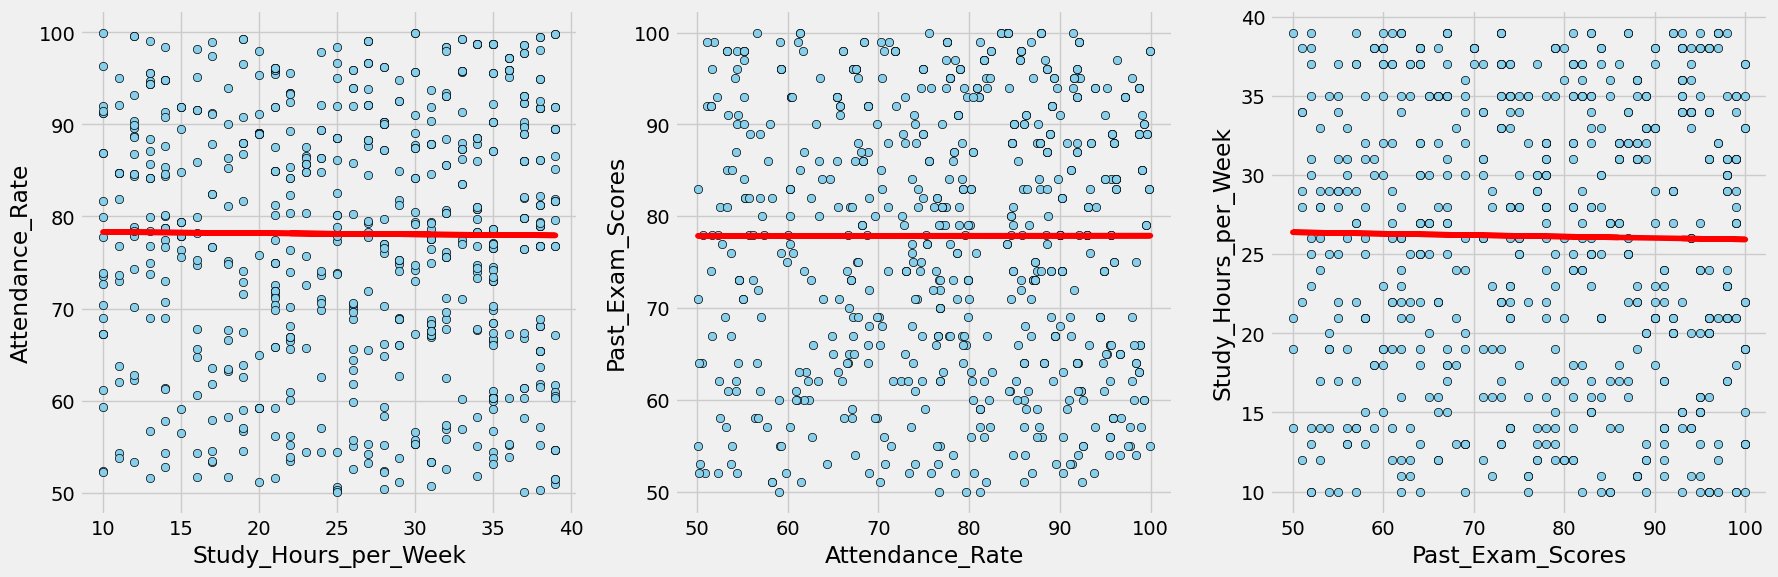

In [16]:
# Vẽ scatter plot với đường hồi quy cho 3 cặp cột trong cùng một hình
def scatter_plots_subplots():
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Tạo lưới 1x3
    axes = axes.flatten()  

    # Biểu đồ 1: Study_Hours_per_Week vs Attendance_Rate
    x1 = original_spp.column('Study_Hours_per_Week')
    y1 = original_spp.column('Attendance_Rate')
    axes[0].scatter(x1, y1, color='skyblue', edgecolor='black')
    m1, b1 = np.polyfit(x1, y1, 1)  # Hệ số hồi quy tuyến tính
    axes[0].plot(x1, m1 * x1 + b1, color='red')
    axes[0].set_xlabel('Study_Hours_per_Week')
    axes[0].set_ylabel('Attendance_Rate')

    # Biểu đồ 2: Attendance_Rate vs Past_Exam_Scores
    x2 = original_spp.column('Attendance_Rate')
    y2 = original_spp.column('Past_Exam_Scores')
    axes[1].scatter(x2, y2, color='skyblue', edgecolor='black')
    m2, b2 = np.polyfit(x2, y2, 1)  # Hệ số hồi quy tuyến tính
    axes[1].plot(x2, m2 * x2 + b2, color='red')
    axes[1].set_xlabel('Attendance_Rate')
    axes[1].set_ylabel('Past_Exam_Scores')

    # Biểu đồ 3: Past_Exam_Scores vs Study_Hours_per_Week
    x3 = original_spp.column('Past_Exam_Scores')
    y3 = original_spp.column('Study_Hours_per_Week')
    axes[2].scatter(x3, y3, color='skyblue', edgecolor='black')
    m3, b3 = np.polyfit(x3, y3, 1)  # Hệ số hồi quy tuyến tính
    axes[2].plot(x3, m3 * x3 + b3, color='red')
    axes[2].set_xlabel('Past_Exam_Scores')
    axes[2].set_ylabel('Study_Hours_per_Week')

    plt.tight_layout() 
    plt.show()

# Gọi hàm để vẽ
scatter_plots_subplots()

In [17]:
print(f"Correlation between Study_Hours_per_Week and Attendance_Rate: {correlation(original_spp, 'Study_Hours_per_Week', 'Attendance_Rate'):.2f}")
print(f"Correlation between Attendance_Rate and Past_Exam_Scores: {correlation(original_spp, 'Attendance_Rate', 'Past_Exam_Scores'):.2f}")
print(f"Correlation between Past_Exam_Scores and Study_Hours_per_Week: {correlation(original_spp, 'Past_Exam_Scores', 'Study_Hours_per_Week'):.2f}")

Correlation between Study_Hours_per_Week and Attendance_Rate: -0.01
Correlation between Attendance_Rate and Past_Exam_Scores: 0.00
Correlation between Past_Exam_Scores and Study_Hours_per_Week: -0.01


## 3.2. Đặc trưng numerical vs Pass_Fail

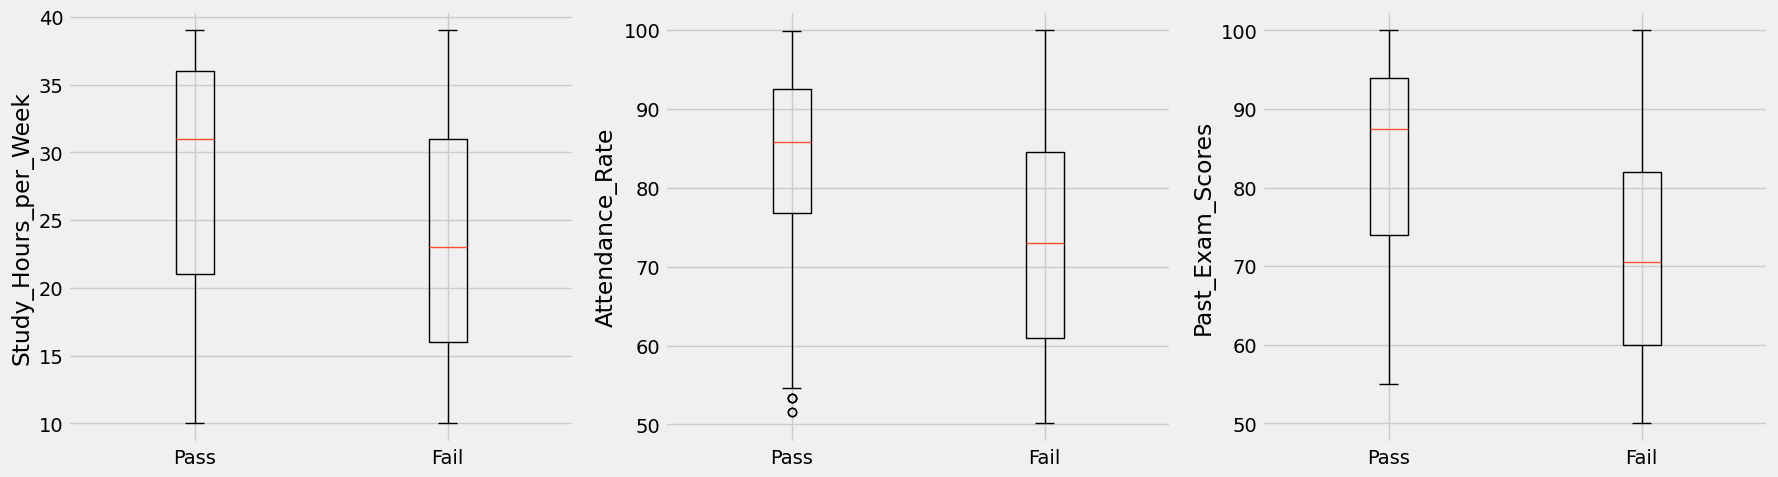

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

for i, feature in enumerate(numerical_features):
    pass_data = original_spp.where('Pass_Fail', 'Pass').column(feature)
    fail_data = original_spp.where('Pass_Fail', 'Fail').column(feature)

    axes[i].boxplot([pass_data, fail_data], labels=['Pass', 'Fail'])
    axes[i].set_ylabel(feature)
    axes[i].grid(True)

plt.tight_layout()
plt.show()

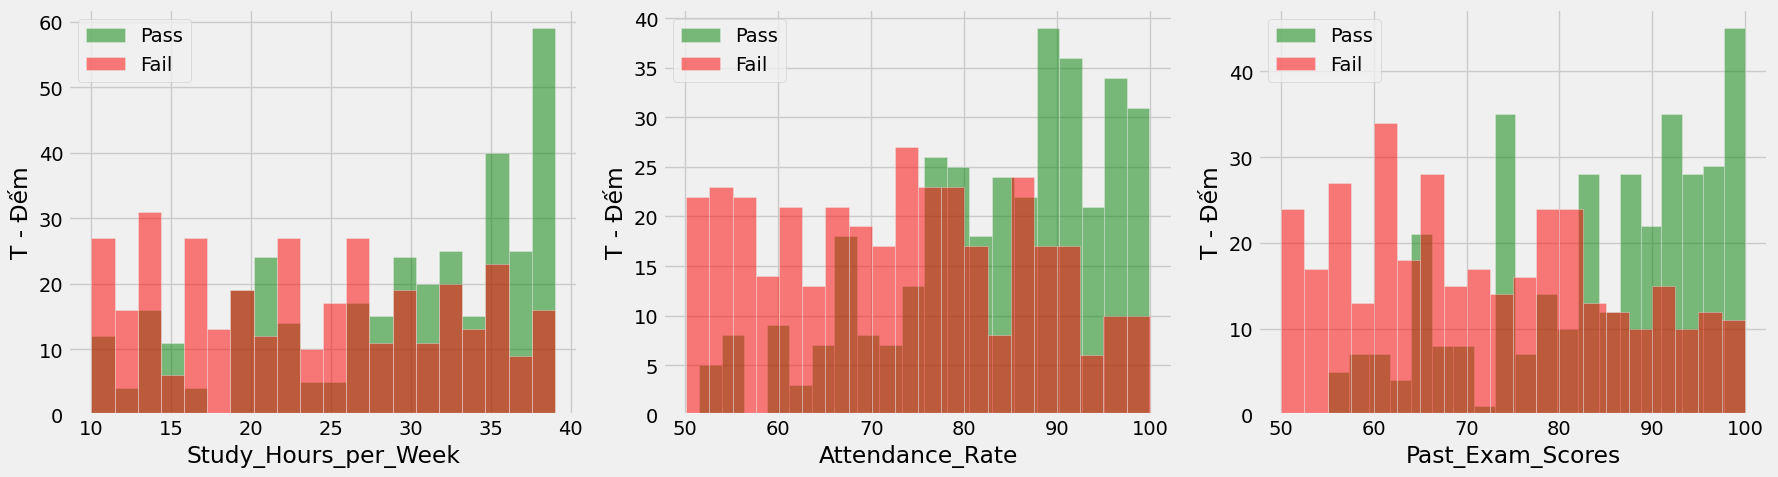

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 hàng, 3 cột

for i, feature in enumerate(numerical_features):
    pass_data = original_spp.where('Pass_Fail', 'Pass').column(feature)
    fail_data = original_spp.where('Pass_Fail', 'Fail').column(feature)

    axes[i].hist(pass_data, bins=20, alpha=0.5, label='Pass', color='green')
    axes[i].hist(fail_data, bins=20, alpha=0.5, label='Fail', color='red')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('T - Đếm')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

## 3.3. Đặc trưng categorical vs Final_Exam_Score

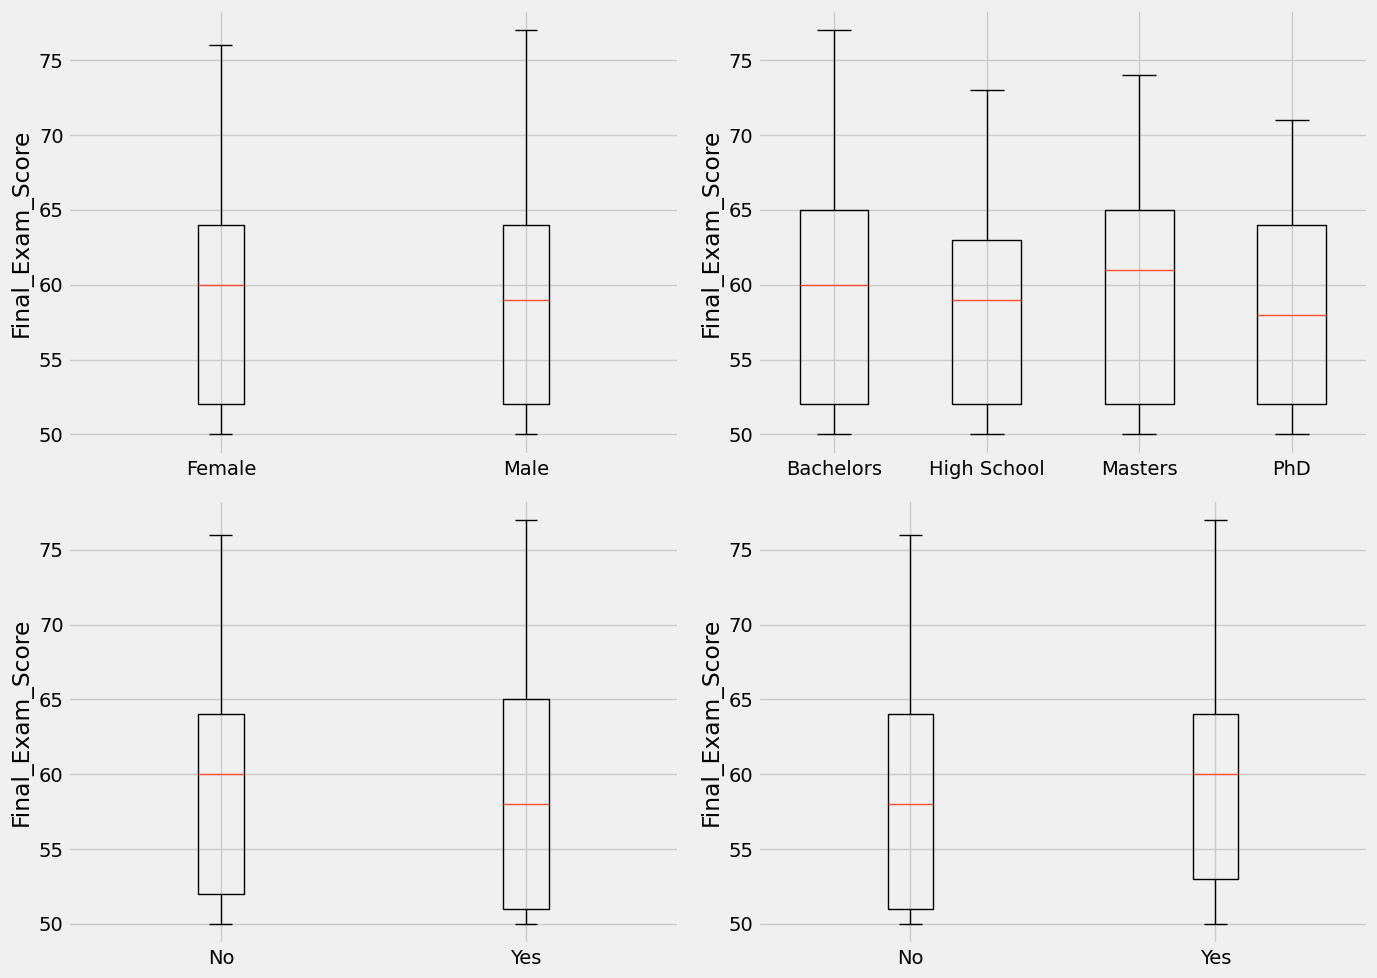

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10)) 
axes = axes.flatten() 

for i, feature in enumerate(categorical_features):
    groups = original_spp.group(feature).column(feature)
    data = [original_spp.where(feature, group).column('Final_Exam_Score') for group in groups]

    axes[i].boxplot(data, labels=groups)
    axes[i].set_ylabel('Final_Exam_Score')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

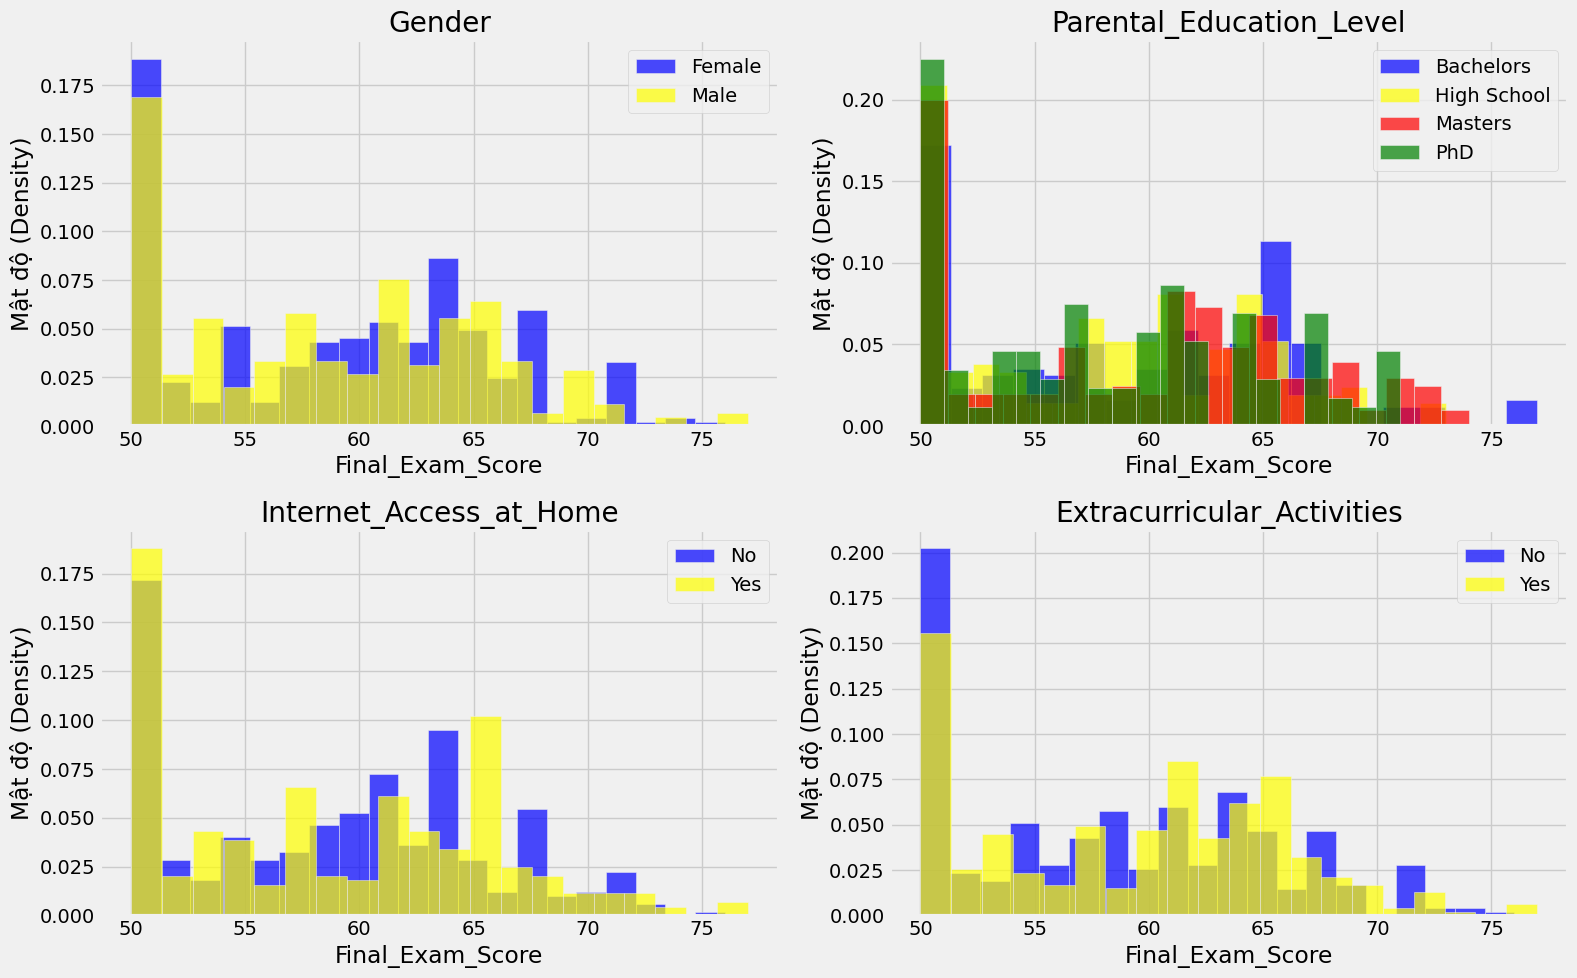

In [41]:

base_colors = ['blue', 'yellow', 'red', 'green']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    ax = axes[i]
    groups = original_spp.group(feature).column(feature)

    # Tạo bảng màu phù hợp với số lượng group
    colors = base_colors[:len(groups)]

    for j, group in enumerate(groups):
        group_data = original_spp.where(feature, group).column('Final_Exam_Score')
        ax.hist(group_data, bins=20, alpha=0.7,
                label=group,
                color=colors[j],
                density=True)
    ax.set_title(f'{feature}')
    ax.set_xlabel('Final_Exam_Score')
    ax.set_ylabel('Mật độ (Density)')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()

## 3.4. Nhận xét

- Các đặc trưng numerical có tương quan khá với Final_exam_score
- Tương quan giữa các đặc trưng numerical thấp
- Các đặc trưng categorical có vẻ không ảnh hưởng nhiều tới kết quả vì quan sát trung bình Final_Exam_Score thì giữa các nhóm xấp xỉ nhau
- Đặc trưng Parental_Education_Level có 4 giá trị có thể, nên khó phân tích. Quan sát biểu đồ, học vấn của phụ huynh là High School, PhD thì Final_Exam_Score thường thấp hơn. Xếp hạng tạm thời High School <  PhD < Bachelors < Masters

=> Các dữ liệu numeric có vẻ có ý nghĩa hơn


# 4. Kiểm định giả thuyết

Sử dụng mức ý nghĩa alpha = 0.5

In [62]:
# Hiển thị phân phối chồng giữa các nhóm
def show_overlaid_distribution(table, group_label, value_label): 
    reduced = table.select(group_label, value_label)
    reduced.hist(value_label, group=group_label)

## 4.1. Nhóm đặc trưng numerical

### Mục tiêu: 
Kiểm tra xem trung bình của các đặc trưng numerical (Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores) có khác biệt đáng kể giữa nhóm Pass và Fail không
### Hypothesis testing
Sử dụng kiểm định one-sided với giả thuyết:
- H0: Trung bình của đặc trưng (e.g., Study_Hours_per_Week) của nhóm Pass bằng nhóm Fail.
- H1: Trung bình của đặc trưng của nhóm Pass cao hơn nhóm Fail.
### Test statistic
mean_pass - mean_fail
### Phương pháp
Permutation test

In [79]:
# Tính toán độ chênh lệch trung bình giữa hai nhóm
def difference_of_means(table, group_label, value_label):
    reduced = table.select(value_label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return means.item(1) - means.item(0)

# Tính toán độ chênh lệch trung bình cho một lần hoán vị
def one_simulated_difference_of_means(table, group_label, value_label):
    # Shuffle nhãn của cột nhóm
    shuffled_labels = table.sample(with_replacement=False).column(group_label)
    shuffled_table = table.select(value_label).with_column('Shuffled Label', shuffled_labels)
    return difference_of_means(shuffled_table, group_label='Shuffled Label', value_label=value_label)

# Mô phỏng phân phối giả thuyết không của độ chênh lệch trung bình
def simulate_null_distribution(table, group_label, value_label, repetitions=5000):
    differences = np.empty(repetitions)  # Khởi tạo mảng với kích thước cố định
    for i in range(repetitions):
        differences[i] = one_simulated_difference_of_means(table, group_label, value_label)    
    return differences


In [57]:
def hypothesis_test(table, group_label, value_label):
    show_overlaid_distribution(table, value_label=value_label, group_label=group_label)
    observed_difference = difference_of_means(table, group_label, value_label)
    print('Observed Difference: ', observed_difference)
    differences = simulate_null_distribution(table, group_label=group_label, value_label=value_label)
    resampled_means = Table().with_column('Difference Between Group Means', differences)
    p_value = sum(np.array(differences) >= observed_difference) / len(differences)
    print('P-value (Pass > Fail):', p_value)
    resampled_means.hist()
    plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

### 4.1.1. Liệu học sinh Pass có thời gian dành cho việc học trong tuần (Study_Hours_per_week) nhiều hơn học sinh Fail không?

Observed Difference:  5.265536723163841
P-value (Pass > Fail): 0.0


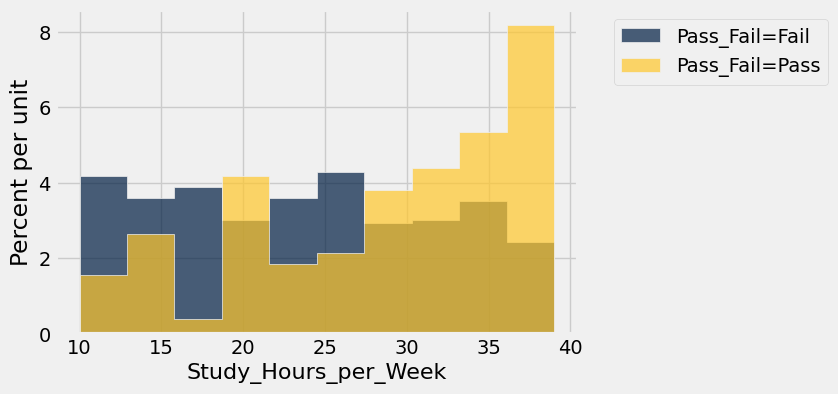

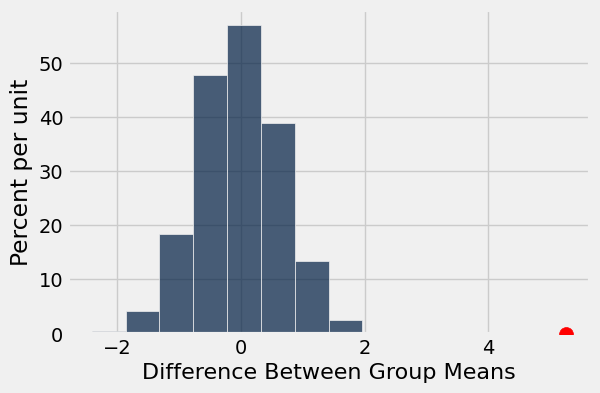

In [58]:
hypothesis_test(original_spp, value_label='Study_Hours_per_Week', group_label='Pass_Fail')

p-value = 0 => Bác bỏ H0
=> Học sinh Pass có thời gian dành cho việc học trong tuần (Study_Hours_per_week) nhiều hơn học sinh Fail

### 4.1.2. Liệu học sinh Pass có điểm trung bình các bài kiểm tra trước đấy (Past_Exam_Scores) cao hơn học sinh Fail không?

Observed Difference:  12.567796610169495
P-value (Pass > Fail): 0.0


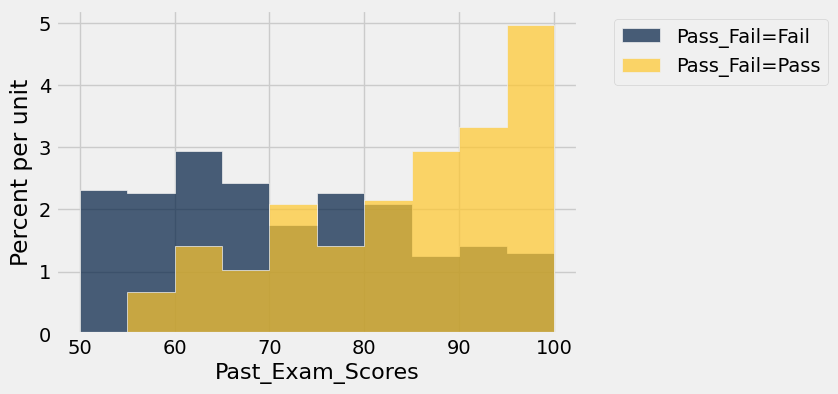

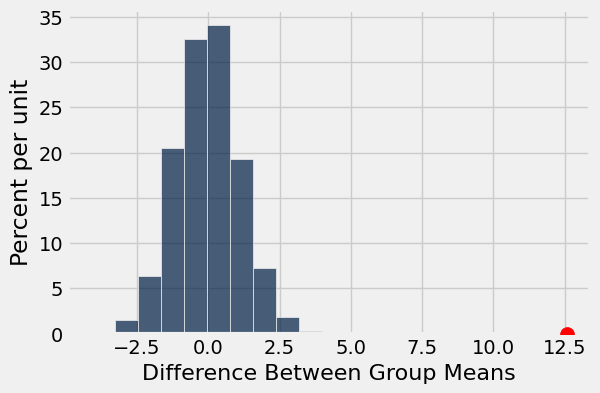

In [59]:
hypothesis_test(original_spp, value_label='Past_Exam_Scores', group_label='Pass_Fail')

p-value = 0 => Bác bỏ H0
=> Học sinh Pass có điểm trung bình các bài kiểm tra trước đấy (Past_Exam_Scores) cao hơn học sinh Fail

### 4.1.3. Liệu học sinh Pass có tỷ lệ đi học (Attendance_rate) cao hơn học sinh Fail không?

Observed Difference:  10.931900225962963
P-value (Pass > Fail): 0.0


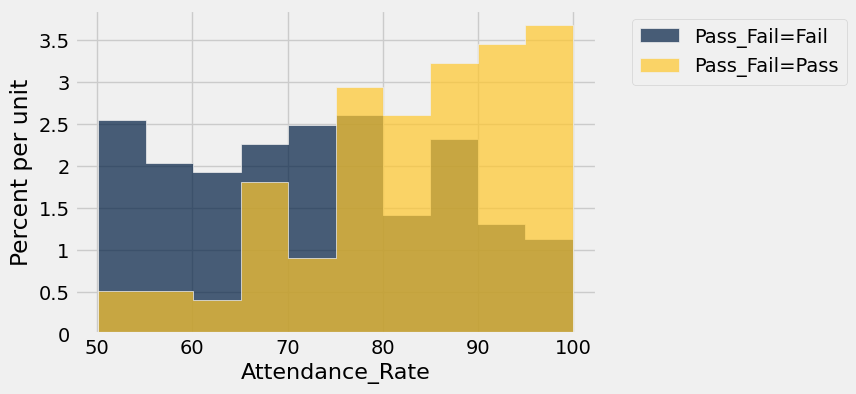

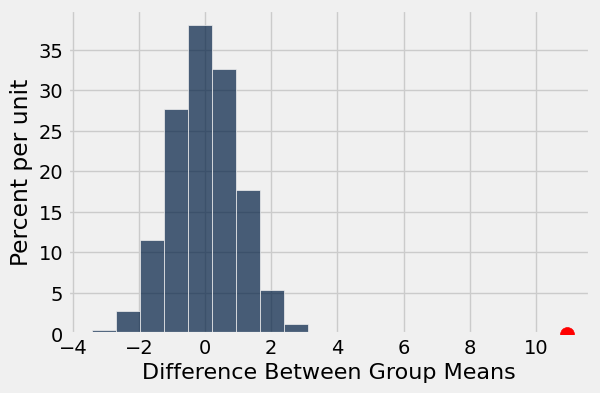

In [60]:
hypothesis_test(original_spp, value_label='Attendance_Rate', group_label='Pass_Fail')

Với ý nghĩa 95%, bác bỏ H0
=> Học sinh Pass có tỷ lệ đi học (Attendance_rate) cao hơn học sinh Fail

## 4.2. Nhóm đặc trưng Categorical

### Mục tiêu: 
Kiểm tra xem trung bình Final_Exam_Score của các nhóm đặc trưng numerical có khác biệt không
### Hypothesis testing
Sử dụng kiểm định two-sided với giả thuyết:
- H0: Trung bình của đặc Final_Exam_Score là như nhau giữa các nhóm.
- H1: Trung bình của đặc Final_Exam_Score khác nhau giữa các nhóm
### Test statistic
mean_final_exam_score_group1 - mean_final_exam_score_group2
### Phương pháp
Permutation test

In [64]:
# Tính toán độ chênh lệch trung bình giữa hai nhóm
def abs_difference_of_means(table, group_label, value_label):
    reduced = table.select(value_label, group_label)
    means_table = reduced.group(group_label, np.average)
    means = means_table.column(1)
    return abs(means.item(1) - means.item(0))

# Tính toán độ chênh lệch trung bình cho một lần hoán vị
def one_simulated_abs_difference_of_means(table, group_label, value_label):
    # Shuffle nhãn của cột nhóm
    shuffled_labels = table.sample(with_replacement=False).column(group_label)
    shuffled_table = table.select(value_label).with_column('Shuffled Label', shuffled_labels)
    return abs_difference_of_means(shuffled_table, group_label='Shuffled Label', value_label=value_label)

# Mô phỏng phân phối giả thuyết không của độ chênh lệch trung bình
def simulate_null_distribution_2_side(table, group_label, value_label, repetitions=5000):
    differences = np.empty(repetitions)  # Khởi tạo mảng với kích thước cố định
    for i in range(repetitions):
        differences[i] = one_simulated_abs_difference_of_means(table, group_label, value_label)    
    return differences

In [67]:
def hypothesis_test_2_side(table, group_label, value_label):
    show_overlaid_distribution(table, value_label=value_label, group_label=group_label)
    observed_difference = abs_difference_of_means(table, group_label, value_label)
    print('Observed Difference: ', observed_difference)
    differences = simulate_null_distribution_2_side(table, group_label=group_label, value_label=value_label)
    resampled_means = Table().with_column('Difference Between Group Means', differences)
    p_value = sum(np.array(differences) >= observed_difference) / len(differences)
    print('P-value (Empirical difference > Observed difference):', p_value)
    resampled_means.hist(left_end=observed_difference)
    plt.scatter(observed_difference, 0, color='red', s=100, zorder=5)

### 4.2.1. Liệu giới tính (Gender) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của Male bằng Female.
- H1: Trung bình Final_Exam_Score của Male khác Female (two-sided test)

Observed Difference:  0.4411291291291306
P-value (Empirical difference > Observed difference): 0.3852


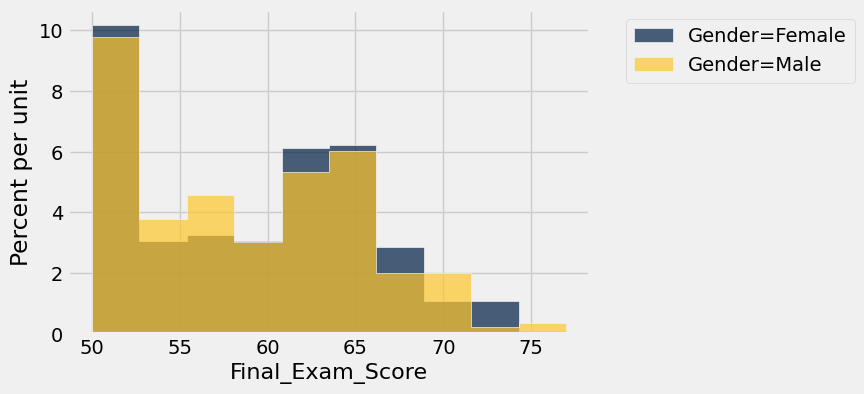

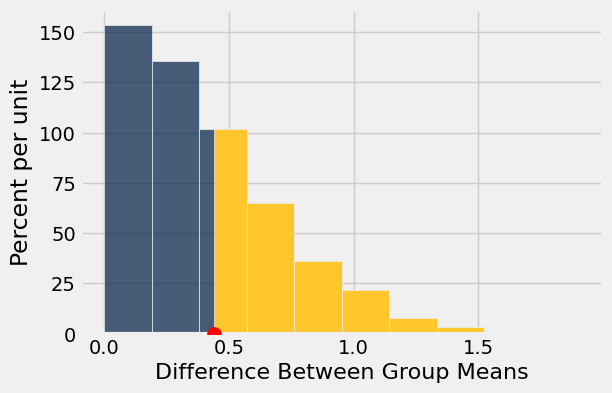

In [68]:
hypothesis_test_2_side(original_spp, 'Gender', 'Final_Exam_Score')

Không bác bỏ H0 => Giới tính không ảnh hưởng

### 4.2.2. Liệu học vấn của phụ huynh (Parental_Education_Level) có ảnh hưởng đến điểm thi cuối kỳ không?

#### 1. High School vs PhD (2 học vấn chênh nhất trong 4 giá trị theo ý nghĩa)
- H0: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=PhD bằng nhóm Parental_Education_Level=High School.
- H1: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=PhD khác nhóm Parental_Education_Level=High School.

Observed Difference:  0.10461997019373825
P-value (Empirical difference > Observed difference): 0.8644


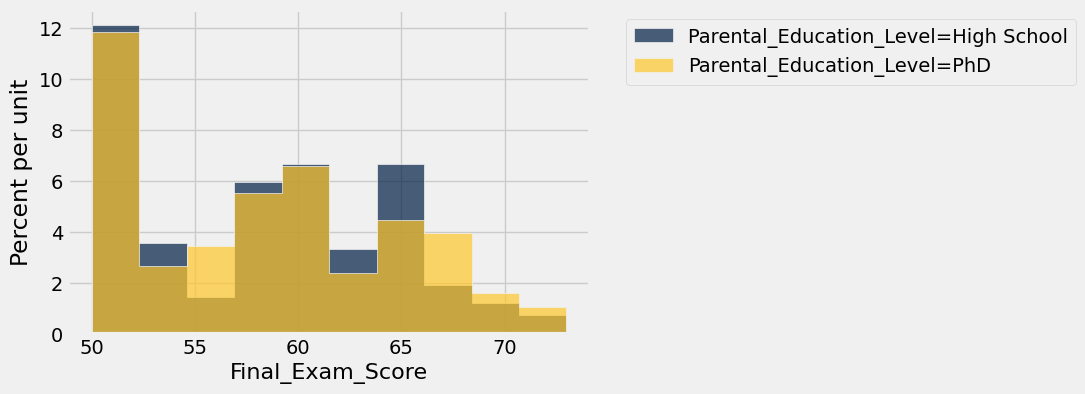

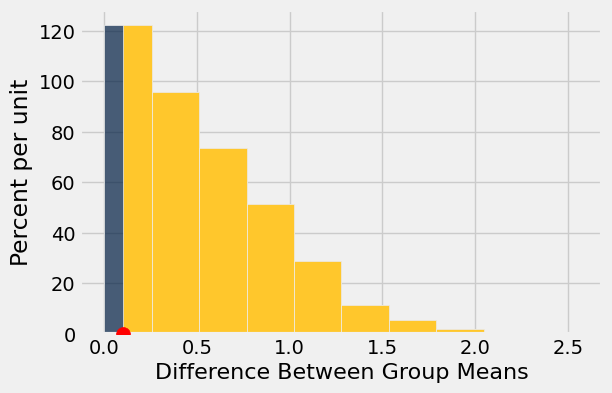

In [74]:
meaning_parental_education = original_spp.where('Parental_Education_Level', are.contained_in(['High School', 'PhD']))
hypothesis_test_2_side(meaning_parental_education, 'Parental_Education_Level', 'Final_Exam_Score')

Không bác bỏ H0 => phụ huynh PhD, High School không ảnh hưởng đến Final_Exam_Score của con cái

#### 2. High School vs Master (2 học vấn chênh nhất trong 4 giá trị theo dữ liệu)
- H0: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=Master bằng nhóm Parental_Education_Level=High School.
- H1: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=Master khác nhóm Parental_Education_Level=High School.

Observed Difference:  1.464960214744515
P-value (Empirical difference > Observed difference): 0.0428


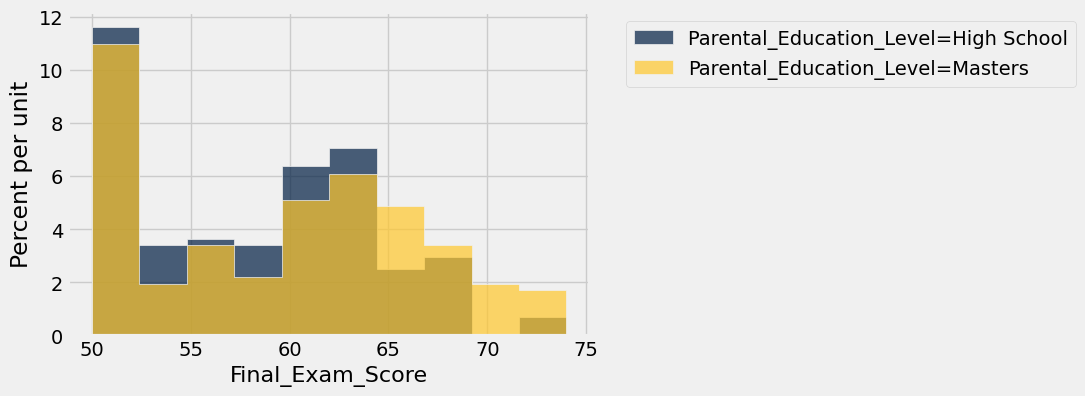

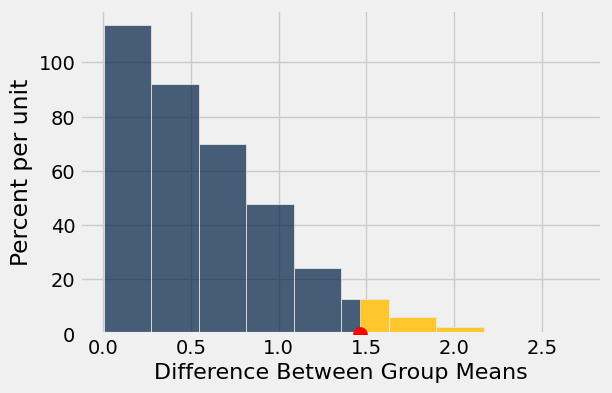

In [76]:
data_parental_education = original_spp.where('Parental_Education_Level', are.contained_in(['High School', 'Masters']))
hypothesis_test_2_side(data_parental_education, 'Parental_Education_Level', 'Final_Exam_Score')

In [81]:
data_parental_education.group('Parental_Education_Level', np.average).show()

Parental_Education_Level,Student_ID average,Gender average,Study_Hours_per_Week average,Attendance_Rate average,Past_Exam_Scores average,Internet_Access_at_Home average,Extracurricular_Activities average,Final_Exam_Score average,Pass_Fail average
High School,,,25.9016,77.0708,78.9891,,,58.1257,
Masters,,,27.1871,79.2738,78.076,,,59.5906,


Với mức ý nghĩa 95%, bác bỏ H0 => Trung bình sinh viên có phụ huynh Masters thì điểm Final_Exam_Score cao hơn phụ huynh High School

#### 3. High School vs Bachelors
- H0: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=Bachelors bằng nhóm Parental_Education_Level=High School.
- H1: Trung bình Final_Exam_Score của nhóm Parental_Education_Level=Bachelors khác nhóm Parental_Education_Level=High School.

Observed Difference:  1.0013010668748379
P-value (Empirical difference > Observed difference): 0.1424


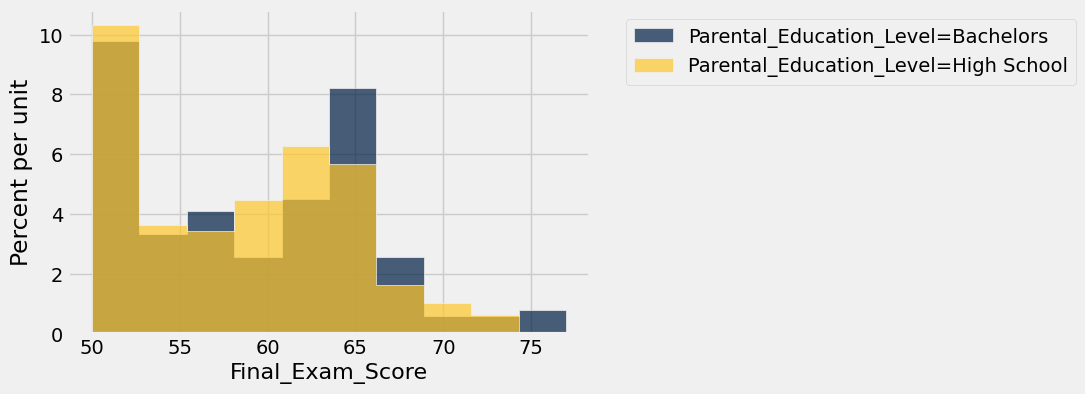

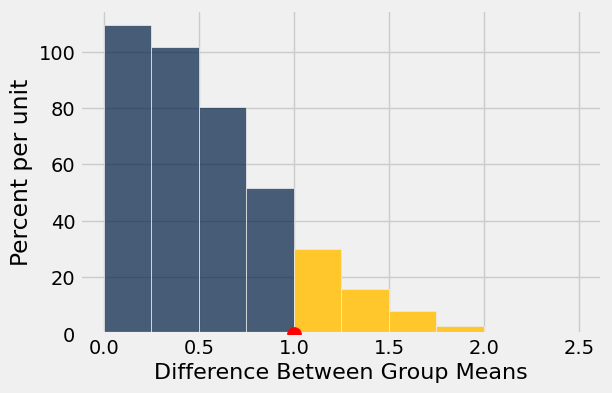

In [82]:
data_parental_education = original_spp.where('Parental_Education_Level', are.contained_in(['High School', 'Bachelors']))
hypothesis_test_2_side(data_parental_education, 'Parental_Education_Level', 'Final_Exam_Score')

Không bác bỏ H0 => Trung bình điểm Final_Exam_Score của sinh viên có phụ huynh Bachelors, High School là như nhau

### 4.2.3. Liệu khả năng truy cập được mạng ở nhà (Internet_Access_at_Home) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm có Internet_Access_at_Home bằng nhóm không có
- H1: Trung bình Final_Exam_Score của nhóm có Internet_Access_at_Home khác nhóm không có

Observed Difference:  0.17717739411013866
P-value (Empirical difference > Observed difference): 0.7314


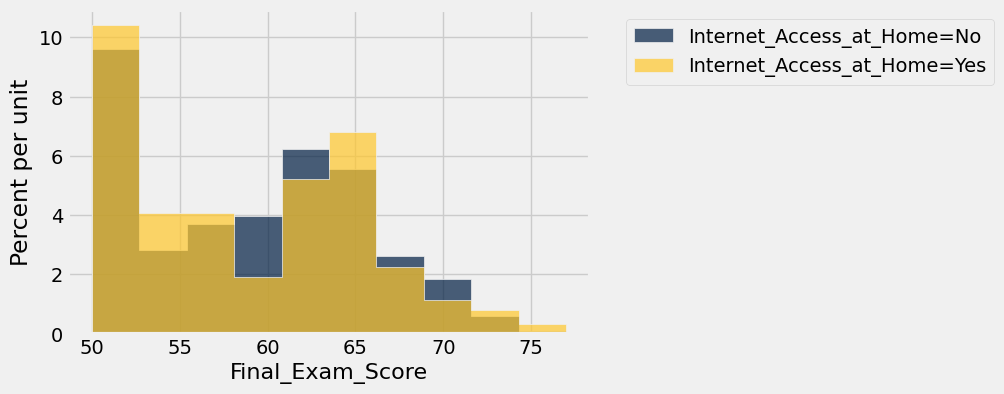

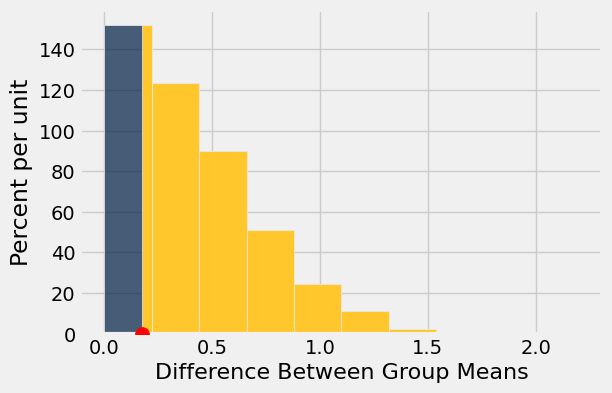

In [69]:
hypothesis_test_2_side(original_spp, 'Internet_Access_at_Home', 'Final_Exam_Score')

Không bác bỏ H0 => Khả năng truy cập được mạng ở nhà không ảnh hưởng đến điểm thi cuối kỳ

### 4.2.4. Liệu việc tham gia hoạt động ngoại khóa (Extracurricular_Activities) có ảnh hưởng đến điểm thi cuối kỳ không?
- H0: Trung bình Final_Exam_Score của nhóm tham gia (Yes) bằng nhóm không tham gia (No)
- H1: Trung bình Final_Exam_Score của nhóm tham gia khác nhóm không tham gia

Observed Difference:  0.9065595887185012
P-value (Empirical difference > Observed difference): 0.0722


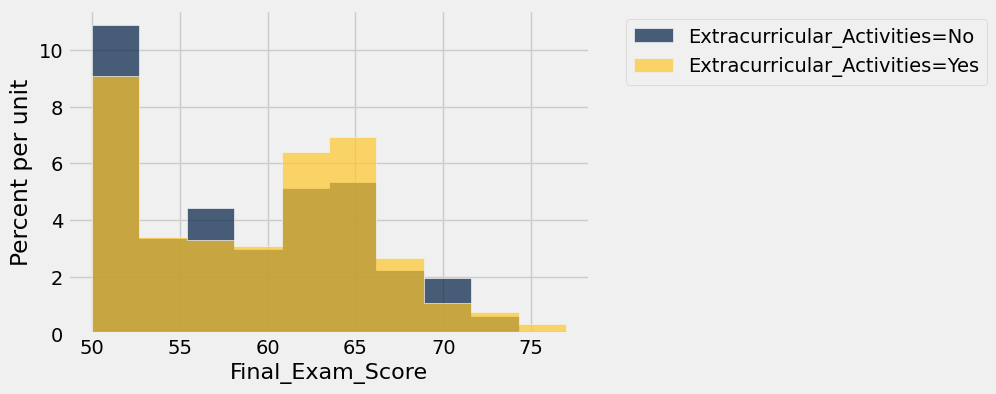

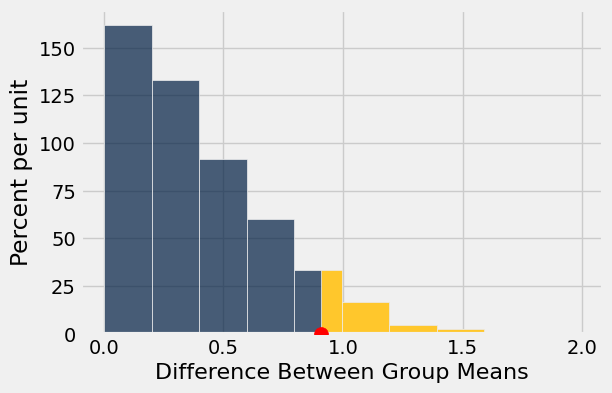

In [70]:
hypothesis_test_2_side(original_spp, 'Extracurricular_Activities', 'Final_Exam_Score')

Không bác bỏ H0
=> Việc tham gia hoạt động ngoại khóa (Extracurricular_Activities) không ảnh hưởng đến điểm thi cuối kỳ

## 4.3. Nhận xét
- Các đặc trưng numerical của sinh viên thi đậu cao hơn sinh viên thi trượt
- Các đặc trưng caregorical về cơ bản không ảnh hưởng đến điểm thi cuối kỳ
- Đặc trung học vấn phụ huynh, nhóm phụ huynh Masters thường có con thi tốt hơn nhẹ nhẹ

=> Chọn đặc trưng numerical

# 5. Ước lượng

Ước lượng trung bình 

In [105]:
def bootstrap_mean(num_repetitions, value):
    medians = make_array()
    for i in np.arange(num_repetitions):
        new_bstrap_sample = original_spp.sample()
        new_bstrap_mean = new_bstrap_sample.column(value).mean()
        medians = np.append(medians, new_bstrap_mean)
    return medians

def estimate(table, value):
    table.hist(value)
    num_repetitions = 5000
    bstrap_means = bootstrap_mean(num_repetitions, value)
    left = percentile(2.5, bstrap_means)
    right = percentile(97.5, bstrap_means)

    resampled_medians = Table().with_columns(
    'Bootstrap Sample Mean', bstrap_means
    )
    resampled_medians.hist(bins=15)
    plt.plot([left, right], [0, 0], color='yellow', lw=8);
    print('Mean:', table.column(value).mean())
    print('Confidence Interval 95%:', left, right)


Khoảng tin cậy 95%: [58.28,  59.28]

In [106]:
pass_group = original_spp.where('Pass_Fail', 'Pass')
fail_group = original_spp.where('Pass_Fail', 'Fail')

## 5.1. Trung bình Past_Exam_Scores

Mean: 84.1553672316
Confidence Interval 95%: 76.7810734463 78.9378531073


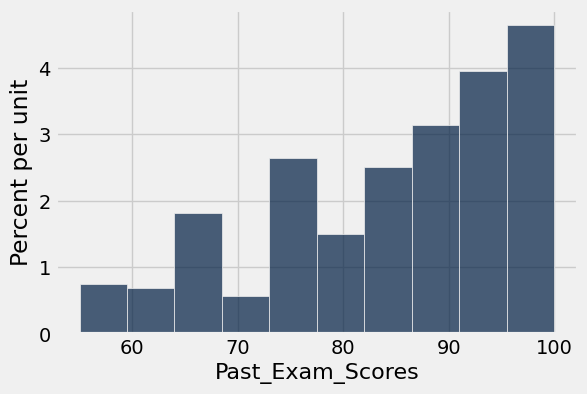

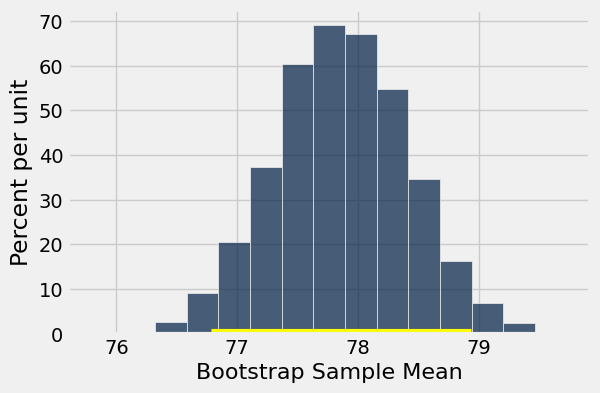

In [107]:
estimate(pass_group, 'Past_Exam_Scores')

Mean: 71.5875706215
Confidence Interval 95%: 76.831920904 78.9081920904


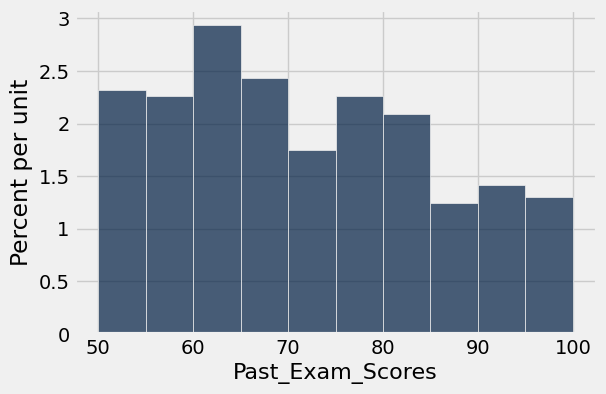

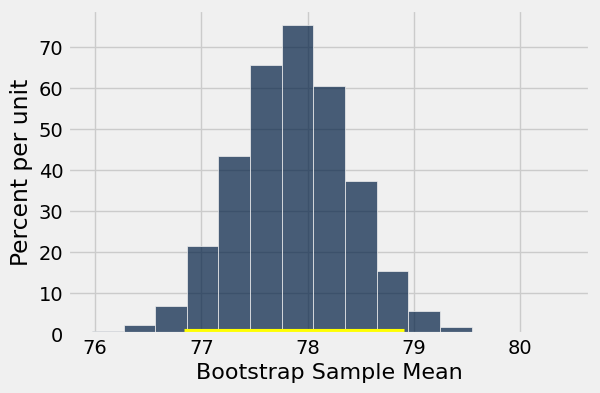

In [108]:
estimate(fail_group, 'Past_Exam_Scores')

## 5.2. Trung bình Attendance_Rate

Mean: 84.1553672316
Confidence Interval 95%: 76.8064971751 78.9081920904
Mean: 71.5875706215
Confidence Interval 95%: 76.7951977401 78.9449152542


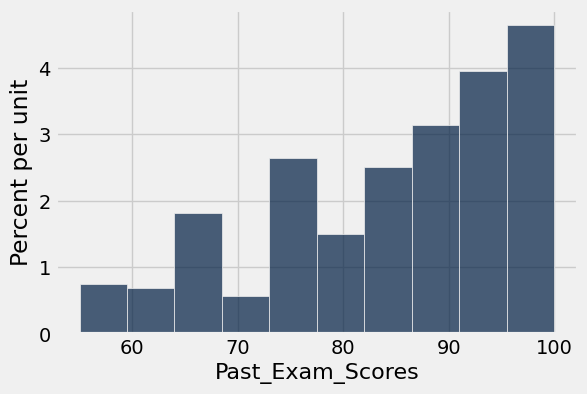

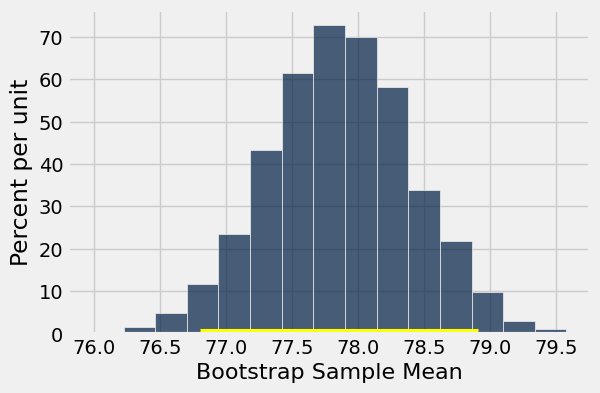

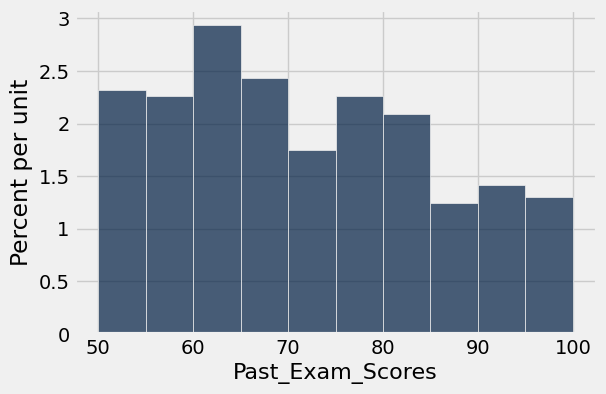

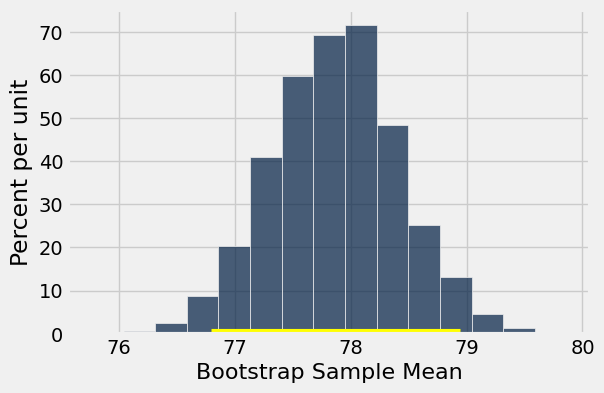

In [109]:
estimate(pass_group, 'Past_Exam_Scores')
estimate(fail_group, 'Past_Exam_Scores')

## 5.3. Trung bình Study_Hours_per_Week

Mean: 28.7655367232
Confidence Interval 95%: 25.4788135593 26.7810734463
Mean: 23.5
Confidence Interval 95%: 25.5028248588 26.7980225989


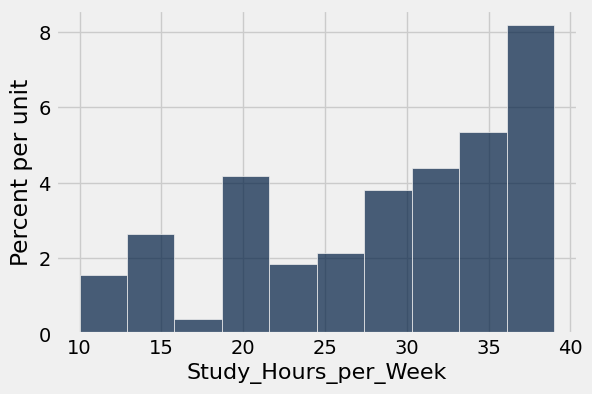

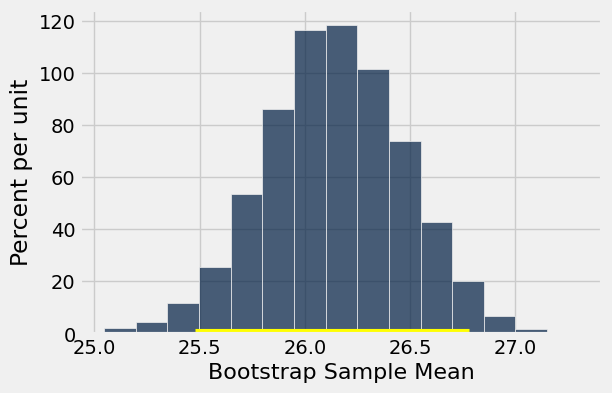

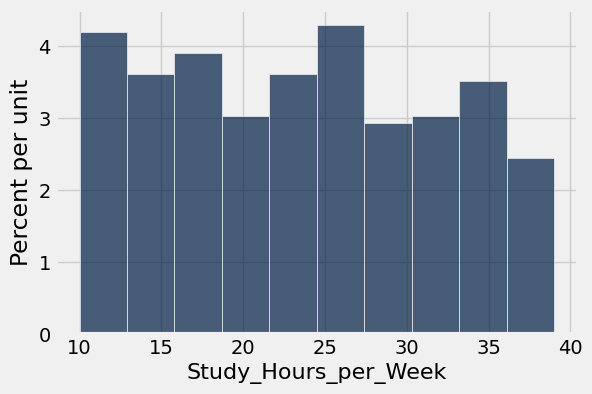

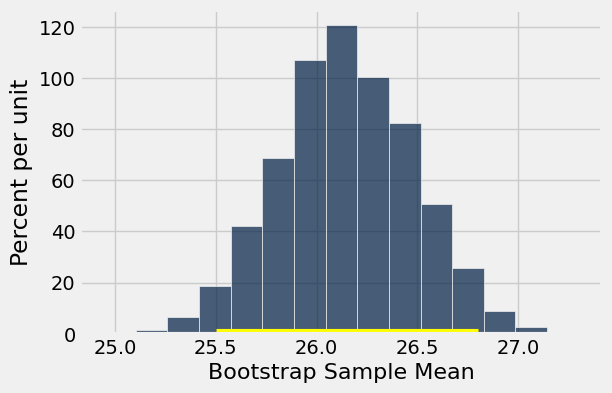

In [110]:
estimate(pass_group, 'Study_Hours_per_Week')
estimate(fail_group, 'Study_Hours_per_Week')

# 6. Phân loại

Chia train, test + chuẩn hóa

In [135]:
label = 'Pass_Fail'

# Chia train/test (80% train, 20% test)
data = original_spp.select(numerical_features + [label]).sample(original_spp.num_rows, with_replacement=True)
train = data.take(np.arange(566))
test = data.take(np.arange(566, 708))

# Chuẩn hóa các đặc trưng trên tập train
train_standardized = train.select(label)
for feature in numerical_features:
    train_standardized = train_standardized.with_column(
        feature, standard_units(train.column(feature))
    )

# Chuẩn hóa tập test dựa trên trung bình và độ lệch chuẩn của tập train
test_standardized = test.select(label)
for feature in numerical_features:
    train_mean = np.mean(train.column(feature))
    train_std = np.std(train.column(feature))
    test_standardized = test_standardized.with_column(
        feature, (test.column(feature) - train_mean) / train_std
    )

Visualize

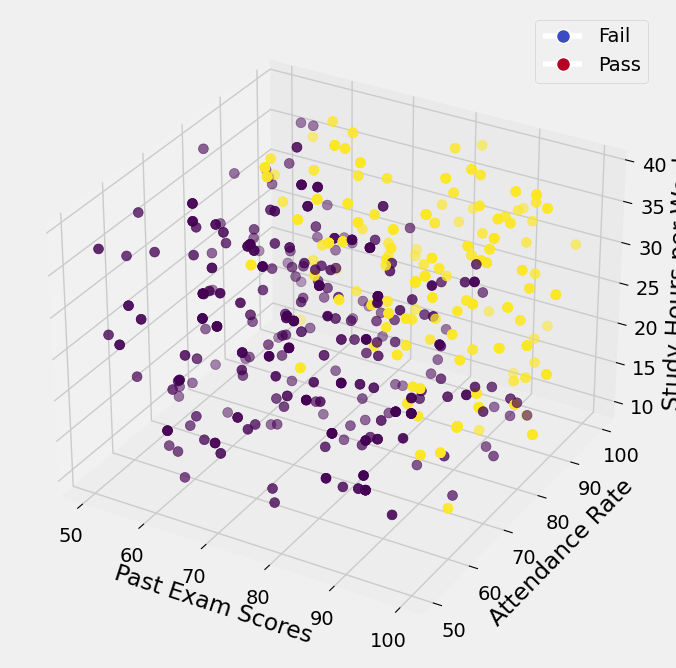

In [127]:
pass_fail_column = data.column('Pass_Fail')
colors = np.array([1 if val == 'Pass' else 0 for val in pass_fail_column])

# Vẽ biểu đồ
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    data.column('Past_Exam_Scores'),
    data.column('Attendance_Rate'),
    data.column('Study_Hours_per_Week'),
    c=colors,
    s=50
)

# Thêm chú thích màu
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Fail',
               markerfacecolor=plt.cm.coolwarm(0.0), markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Pass',
               markerfacecolor=plt.cm.coolwarm(1.0), markersize=10)
]
ax.legend(handles=legend_elements, loc='best')

# Gán nhãn trục
ax.set_xlabel('Past Exam Scores')
ax.set_ylabel('Attendance Rate')
ax.set_zlabel('Study Hours per Week')

plt.show()

KNN

In [122]:
np.random.seed(42)

In [112]:
def distance(pt1, pt2):
    """Tính khoảng cách Euclidean giữa hai điểm"""
    return np.sqrt(np.sum((pt1 - pt2) ** 2))

def knn_predict(table, features, label, k, test_point):
    """Dự đoán nhãn cho một điểm thử nghiệm"""
    distances = []
    test_point_array = np.array([test_point[feature] for feature in features])
    
    for i in range(table.num_rows):
        point = np.array([table.column(feature)[i] for feature in features])
        dist = distance(test_point_array, point)
        distances.append([dist, table.column(label)[i]])
    
    distances = Table().with_columns('Distance', [d[0] for d in distances], 
                                    'Label', [d[1] for d in distances])
    nearest = distances.sort('Distance').take[:k]
    return nearest.group('Label').sort('count', descending=True).column('Label')[0]

def evaluate_knn(train_table, test_table, features, label, k):
    """Đánh giá độ chính xác của k-NN trên tập test"""
    predictions = []
    for i in range(test_table.num_rows):
        test_point = {feature: test_table.column(feature)[i] for feature in features}
        true_label = test_table.column(label)[i]
        pred_label = knn_predict(train_table, features, label, k, test_point)
        predictions.append(pred_label == true_label)
    return np.mean(predictions)

In [117]:
original_spp.num_rows, original_spp.num_rows * 0.8

(708, 566.4)

Độ chính xác trên tập test với k=3: 0.887
Độ chính xác trên tập test với k=5: 0.873
Độ chính xác trên tập test với k=7: 0.838
Độ chính xác trên tập test với k=9: 0.824
Độ chính xác trên tập test với k=11: 0.810
Độ chính xác trên tập test với k=13: 0.838
Độ chính xác trên tập test với k=15: 0.845

Giá trị k tối ưu: 3 với độ chính xác trên tập test: 0.887


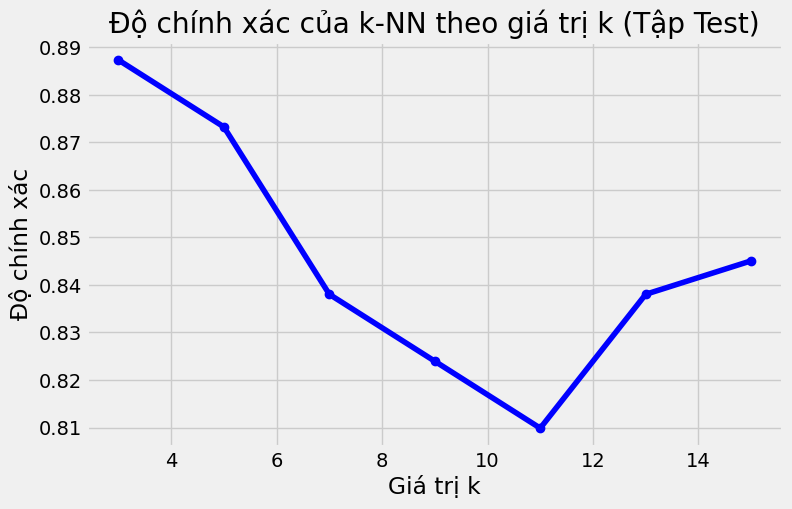

In [128]:

# 6.3. Thử nghiệm với các giá trị k
k_values = [3, 5, 7, 9, 11, 13, 15]
accuracies = []

for k in k_values:
    accuracy = evaluate_knn(train_standardized, test_standardized, numerical_features, label, k)
    accuracies.append(accuracy)
    print(f"Độ chính xác trên tập test với k={k}: {accuracy:.3f}")

# Tìm k tối ưu
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"\nGiá trị k tối ưu: {best_k} với độ chính xác trên tập test: {best_accuracy:.3f}")

# 6.4. Trực quan hóa độ chính xác theo k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', color='blue')
plt.title('Độ chính xác của k-NN theo giá trị k (Tập Test)')
plt.xlabel('Giá trị k')
plt.ylabel('Độ chính xác')
plt.grid(True)
plt.show()

In [130]:
def evaluate_all_knn(train_table, test_table, features, label, k):
    """Đánh giá độ chính xác và lưu dự đoán trên tập test"""
    predictions = []
    correct = []
    for i in range(test_table.num_rows):
        test_point = {feature: test_table.column(feature)[i] for feature in features}
        true_label = test_table.column(label)[i]
        pred_label = knn_predict(train_table, features, label, k, test_point)
        predictions.append(pred_label)
        correct.append(pred_label == true_label)
    accuracy = np.mean(correct)
    return accuracy, predictions, correct

Độ chính xác trên tập test với k=3: 0.873


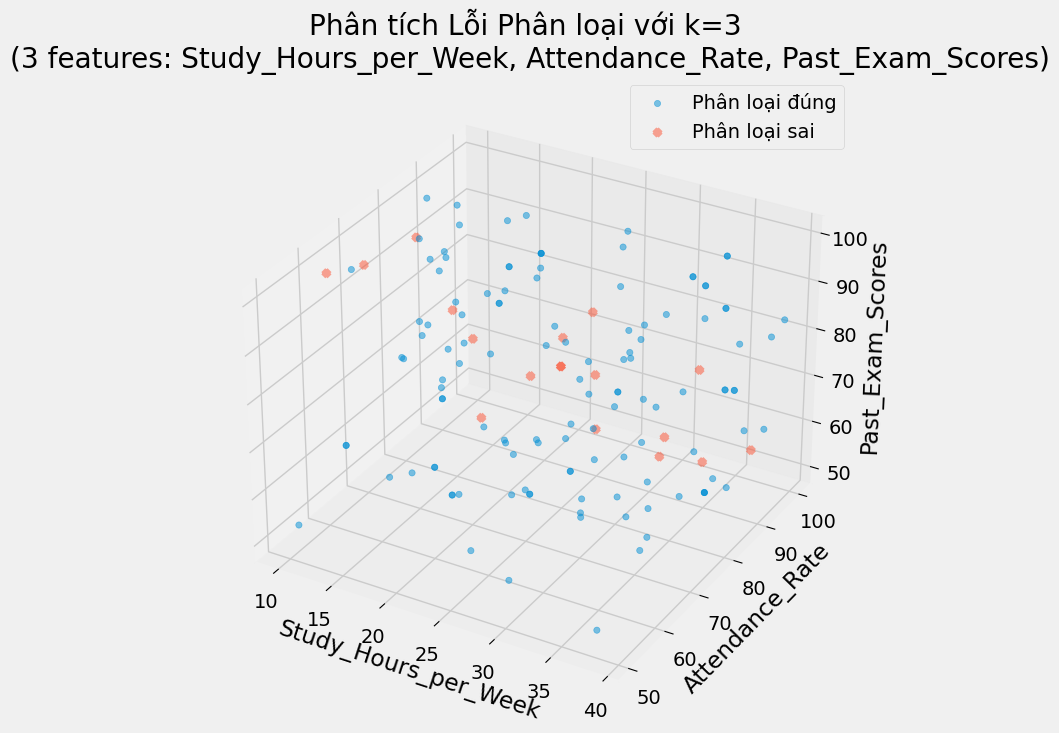

In [145]:
# 6.6. Biểu đồ phân tích lỗi với k=3
label = 'Pass_Fail'
accuracy_k3, predictions_k3, correct_k3 = evaluate_all_knn(train_standardized, test_standardized, numerical_features, label, k=3)
print(f"Độ chính xác trên tập test với k=3: {accuracy_k3:.3f}")


# Tạo bảng dữ liệu với nhãn thực tế, dự đoán, và trạng thái đúng/sai, sử dụng thang gốc
test_plot_data = test.select(numerical_features + [label])  # Sử dụng thang gốc từ test
test_plot_data = test_plot_data.with_columns(
    'Prediction', predictions_k3,
    'Correct', correct_k3
)

# Vẽ scatter plot 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for correct_status in [True, False]:
    subset = test_plot_data.where('Correct', correct_status)
    marker = 'o' if correct_status else 'x'
    label = 'Phân loại đúng' if correct_status else 'Phân loại sai'
    ax.scatter(
        subset.column('Study_Hours_per_Week'),
        subset.column('Attendance_Rate'),
        subset.column('Past_Exam_Scores'),
        marker=marker,
        label=label,
        alpha=0.5
    )

ax.set_title('Phân tích Lỗi Phân loại với k=3 \n(3 features: Study_Hours_per_Week, Attendance_Rate, Past_Exam_Scores)')
ax.set_xlabel('Study_Hours_per_Week')
ax.set_ylabel('Attendance_Rate')
ax.set_zlabel('Past_Exam_Scores')
ax.legend()
ax.grid(True)
plt.show()